**IMPORTING THE LIBRARIES**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

**Reading the dataset**

In [25]:
data = pd.read_csv("Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Analyzing the data**

In [26]:
data.drop(['Serial No.'],axis=1,inplace=True)
data.head

<bound method NDFrame.head of      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
395        324          110                  3  3.5   3.5  9.04         1   
396        325          107                  3  3.0   3.5  9.11         1   
397        330          116                  4  5.0   4.5  9.45         1   
398        312          103                  3  3.5   4.0  8.78         0   
399        333          117                  4  5.0   4.0  9.66         1   

     Chance of Admit   
0                0.92

In [27]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


**Handling missing values**

In [29]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Splitting dependent and Independent columns**

In [30]:
X=data.iloc[:,0:7].values
X.shape

(400, 7)

In [31]:
y=data['Chance of Admit ']
y.shape

(400,)

**Data visualization**

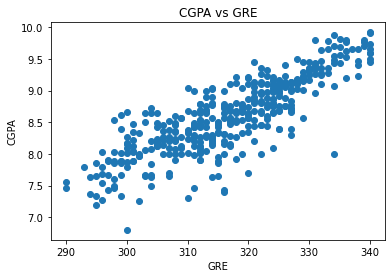

In [32]:
plt.scatter(data['GRE Score'],data['CGPA'])
plt.title('CGPA vs GRE')
plt.xlabel('GRE')
plt.ylabel('CGPA')
plt.show()

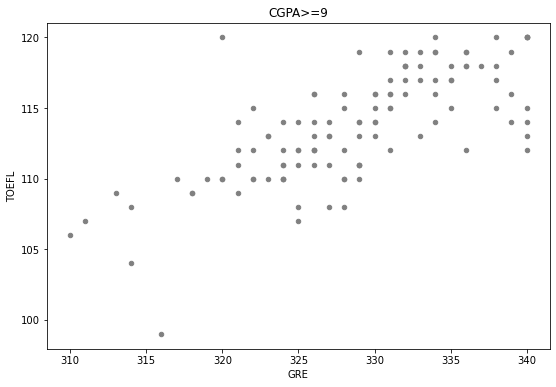

In [33]:
data[data.CGPA >= 9].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="GRAY",figsize=(9,6))
plt.xlabel("GRE")
plt.ylabel("TOEFL")
plt.title("CGPA>=9")

plt.show()


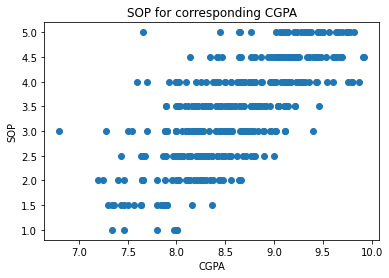

In [34]:
plt.scatter(data['CGPA'],data['SOP'])
plt.title('SOP for corresponding CGPA')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.grid=True
plt.show()

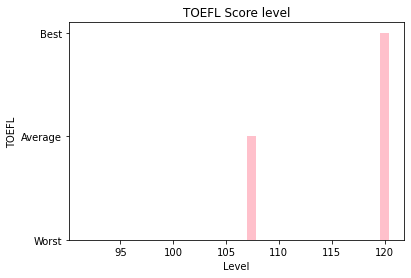

In [35]:
pn = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
rn = ["Worst","Average","Best"]
plt.bar(pn,rn,color="PINK")
plt.title("TOEFL Score level")
plt.xlabel("Level")
plt.ylabel("TOEFL")
plt.show()

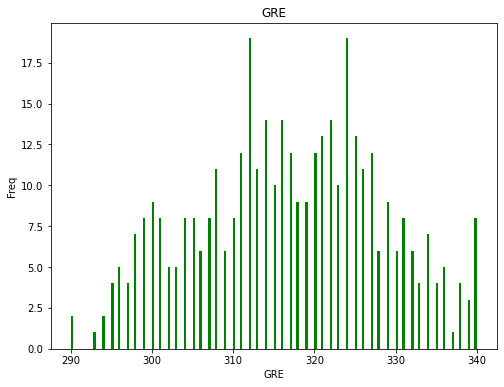

In [36]:
data["GRE Score"].plot(kind = 'hist',bins = 180,color="GREEN",figsize = (8,6))
plt.title("GRE")
plt.xlabel("GRE")
plt.ylabel("Freq")
plt.show()

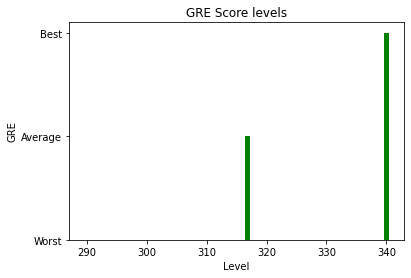

In [37]:
gsm= np.array([data["GRE Score"].min(),data["GRE Score"].mean(),data["GRE Score"].max()])
hsm = ["Worst","Average","Best"]
plt.bar(gsm,hsm,color="Green")
plt.title("GRE Score levels")
plt.xlabel("Level")
plt.ylabel("GRE")
plt.show()

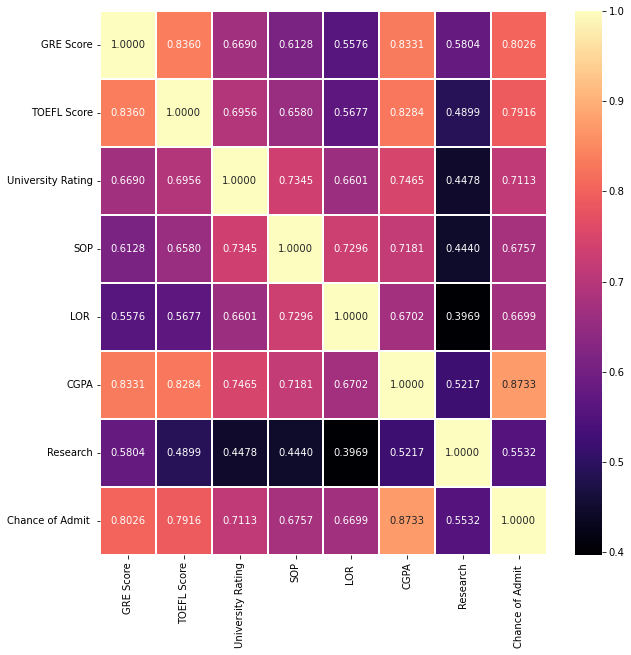

In [38]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=0.08, fmt= '.4f',cmap="magma")
plt.show()

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

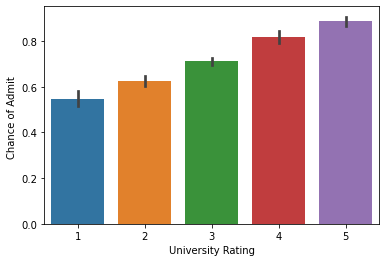

In [39]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=data)

<AxesSubplot:xlabel='University Rating', ylabel='count'>

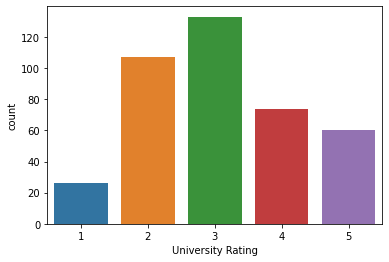

In [40]:
data.Research.value_counts()
sns.countplot(x="University Rating",data=data)

**Splitting The Data Into Train And Test**

In [41]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)


In [42]:
X_train.shape


(320, 7)

In [43]:
X_test.shape

(80, 7)

In [44]:
y_train.shape

(320,)

In [45]:
y_train=(y_train>0.5)
y_train

303    True
349    True
149    True
100    True
175    True
       ... 
369    True
320    True
15     True
125    True
265    True
Name: Chance of Admit , Length: 320, dtype: bool

In [46]:
y_train.shape

(320,)

In [47]:
y_test=(y_test>0.5)
y_test

332     True
111     True
352     True
205     True
56      True
       ...  
304     True
187     True
166     True
64      True
27     False
Name: Chance of Admit , Length: 80, dtype: bool

In [48]:
!pip install sklearn

**Training and Testing the model**

In [58]:
from sklearn.linear_model import LogisticRegression
cls=LogisticRegression(random_state=0, max_iter=1000)
lr=cls.fit(X_train,y_train)
ypred=lr.predict(X_test)
ypred


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False])

In [50]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix 
print("\nAccuracy score: %f" %(accuracy_score(y_test,ypred)*100))
print("Recall score : %f" %(recall_score(y_test,ypred)*100))
print("ROC score : %f\n" %(roc_auc_score(y_test,ypred)*100))
print(confusion_matrix(y_test,ypred))


Accuracy score: 91.250000
Recall score : 97.333333
ROC score : 48.666667

[[ 0  5]
 [ 2 73]]


In [53]:
import pickle 
pickle.dump(lr,open('university.pkl','wb'))
model=pickle.load(open('university.pkl','rb'))

In [61]:
pip install -U ibm-watson-machine-learning

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: ibm-watson-machine-learning in c:\users\elcot\anaconda3\lib\site-packages (1.0.257)



In [63]:
from ibm_watson_machine_learning import APIClient import json

SyntaxError: invalid syntax (3445916322.py, line 1)

In [64]:
uml_credential = {
    
"url"; ""}

SyntaxError: invalid syntax (3919049380.py, line 3)